<a href="https://colab.research.google.com/github/talha-amir/Sparks-Foundation/blob/main/Task%201%3A%20Prediction%20using%20Supervised%20ML%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 01:

**Goal : Predict the percentage of an student based on the no. of study hours.**

Data Set: http://bit.ly/w-data

Importing the required modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from requests import get

Step 1: Loading the data set

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
# checking the head of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# checking the tail of the data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Observing the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Observing the range of values, max, min etc

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Reducing data Size ( converting int64 to int8 and float)

In [ ]:
data['Scores'] = pd.to_numeric(data['Scores'], downcast='integer')
data['Hours'] = pd.to_numeric(data['Hours'], downcast='float')

Memory usuage reduced from 528.0 bytes till 253.0 bytes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float32
 1   Scores  25 non-null     int8   
dtypes: float32(1), int8(1)
memory usage: 253.0 bytes


Checking for null values in data set

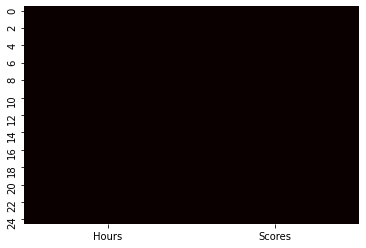

In [ ]:

sns.heatmap(data.isnull(),cmap="hot",cbar=False)

No null values found !!

Using Seaborn's Scatterplot to observe the data

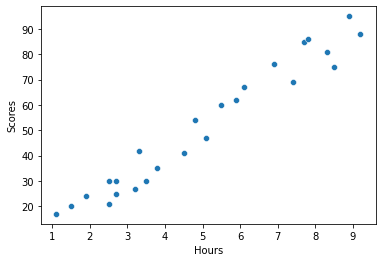

In [ ]:
sns.scatterplot(y=data['Scores'],x=data['Hours'])

In [ ]:
# Feature Variable
x = data.iloc[:,:-1]
# Target Varaible
y = data.iloc[:,1]

# Train Test split rattion 67 : 33
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

Training the model

In [ ]:
model = LinearRegression().fit(X_train,y_train)

In [ ]:
model.coef_

array([9.542802], dtype=float32)

In [ ]:
model.intercept_

2.763134

Two methods for plotting the regression line
1. Using Matplot lib
2. Using Seaborn

**Using Matplotlib :**

In [ ]:
# Equation is """y = mx + c"""
linear_model = (model.coef_*x)+model.intercept_  

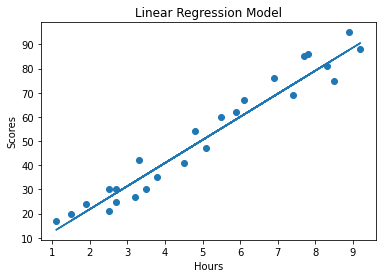

In [ ]:
plt.scatter(x,y)
plt.plot(x,linear_model)
plt.title("Linear Regression Model") 
plt.xlabel("Hours") 
plt.ylabel("Scores")
plt.show()

**Using Seaborn:**

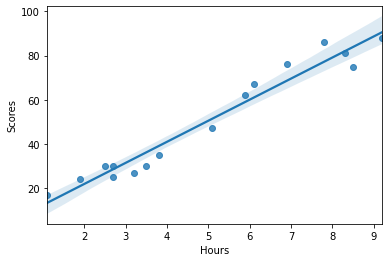

In [ ]:
sns.regplot(x=X_train,y=y_train)

**Predicting Values:**

In [ ]:
predictions =  model.predict(X_test)
predictions

array([55.248543, 26.620138, 73.37987 , 87.69406 , 76.24271 , 45.70574 ,
       34.25438 , 48.568584, 17.077337], dtype=float32)

**Model Accuracy:**

In [ ]:
explained_variance_score(predictions,y_test)*100

94.10328269004822

**Predicting the Given Value: Hour = 9.25** 

In [ ]:
print("Hours = 9.25 \nPredicted Score: ",end="")
model.predict(np.array(9.25).reshape(1,-1))[0]

Hours = 9.25 
Predicted Score: 

91.03405117988586